# **IPL Dataset**

**Aditi Sawant**

**Data Science and Business Analytics Intern**

**Exploratory Data Analysis- Sports**

**Load Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [28]:
data = pd.read_csv("/content/matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Exploring the Dataset**

In [29]:
data.shape

(756, 18)

In [30]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [31]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [33]:
data.result.value_counts()


normal       743
tie            9
no result      4
Name: result, dtype: int64

In [34]:
data = data.drop('umpire3', axis = 1)


# Exploratory Analysis

**Total Number of Matches**

In [35]:
data['id'].max()

11415

**Different Seasons**

In [36]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

**Number Of Matches per Season**

In [56]:
matches_per_season = matches_df.groupby('season').id.count()


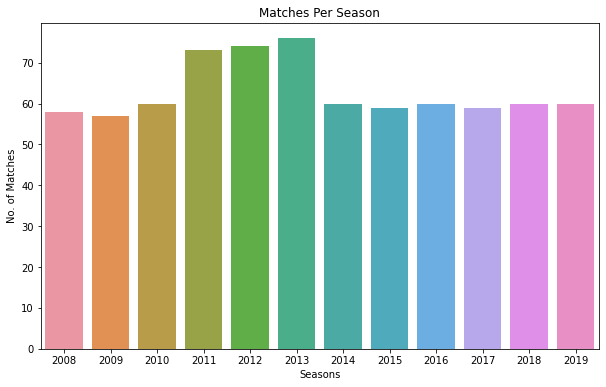

In [57]:
plt.figure(figsize=(10,6))
plt.title('Matches Per Season')
match_per_season_plot = sns.countplot(x = 'season', data = data)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

In [38]:
data.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

**Winning Teams**

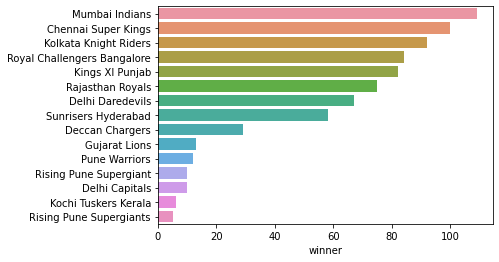

In [39]:
value = data.winner.value_counts()
sns.barplot(y = value.index, x = value, orient='h');

**Top Players**

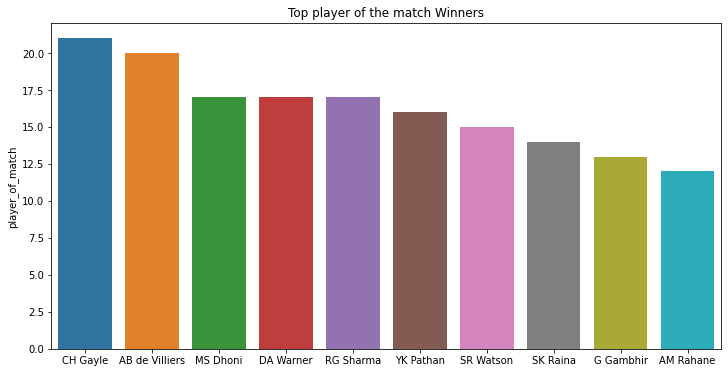

In [40]:
top_players = data.player_of_match.value_counts()[:10]
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

**Analysis of Toss**

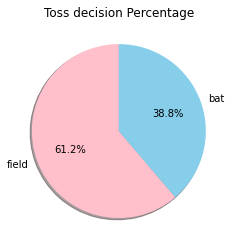

In [41]:
temp_series = data.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series/temp_series.sum())*100))
colors = ['Pink','SkyBlue']
plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss decision Percentage")
plt.show()

In [59]:
toss_decision_percentage = data.groupby('season').toss_decision.value_counts().sort_index() / matches_per_season * 100
toss_decision_percentage


season  toss_decision
2008    bat              44.827586
        field            55.172414
2009    bat              61.403509
        field            38.596491
2010    bat              65.000000
        field            35.000000
2011    bat              34.246575
        field            65.753425
2012    bat              50.000000
        field            50.000000
2013    bat              59.210526
        field            40.789474
2014    bat              31.666667
        field            68.333333
2015    bat              42.372881
        field            57.627119
2016    bat              18.333333
        field            81.666667
2017    bat              18.644068
        field            81.355932
2018    bat              16.666667
        field            83.333333
2019    bat              16.666667
        field            83.333333
dtype: float64

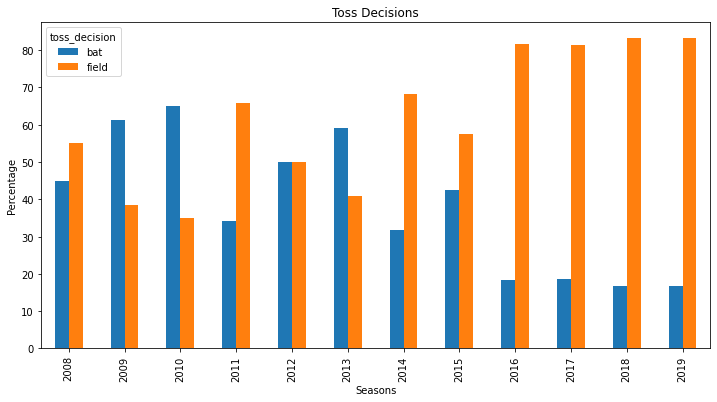

In [60]:
toss_decision_percentage.unstack().plot(kind = 'bar', figsize=(12,6), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage');

In [42]:
toss = data['toss_winner'] == data['winner']
toss.groupby(toss).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


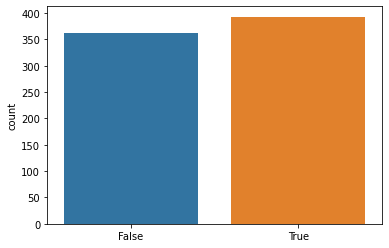

In [43]:
sns.countplot(toss)

# Analysis of Various Teams

**Numbers of wins for each Team**

In [44]:
data['winner'].sort_values().value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**Which Team had won by maximum runs?**

In [45]:
data.iloc[data['win_by_runs'].idxmax()]


id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

**Team Performance**

In [46]:
data[data['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

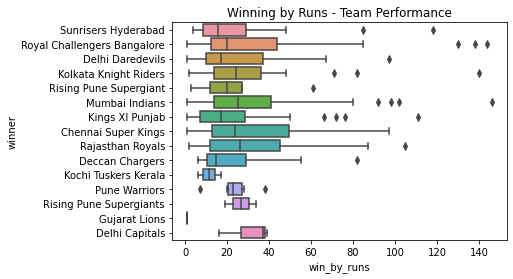

In [47]:
fig, ax = plt.subplots()
fig.figsize = [16,10]
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=data[data['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

**Which Team had won by maximum wickets?**

In [48]:
data.iloc[data['win_by_wickets'].idxmax()]['winner']


'Kolkata Knight Riders'

**Which Team had won by minimum wickets?**

In [49]:
data.iloc[data[data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]


id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
Name: 559, dtype: object

In [50]:
data[data['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Rising Pune Supergiants        7.0
Royal Challengers Bangalore    6.5
Pune Warriors                  6.5
Delhi Daredevils               6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kolkata Knight Riders          6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Delhi Capitals                 5.0
Name: win_by_wickets, dtype: float64

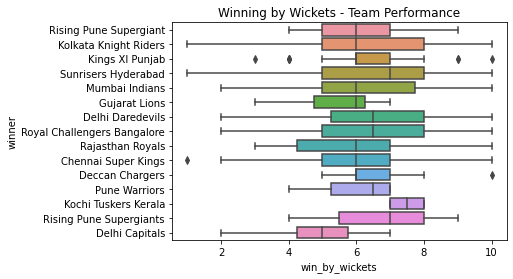

In [51]:
fig, ax = plt.subplots()
fig.figsize = [16,10]
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=data[data['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()

# Insights

**Top Teams -** 

Mumbai Indians

Chennai Super Kings

Kolkata Knight Riders

**Top players -**

Chris Gayle

AB de Villers

MS Dhoni

**Toss has no effect on winning**
